In [72]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf  # for data
from pandas_datareader import data as pdr
import altair as alt
yf.pdr_override()

In [102]:
def read_data(stock='QQQ'):


    df = pdr.get_data_yahoo(stock,period = "360d",

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = "1d",) 
    return df

In [53]:
df = read_data(stock='BK')

[*********************100%***********************]  1 of 1 completed


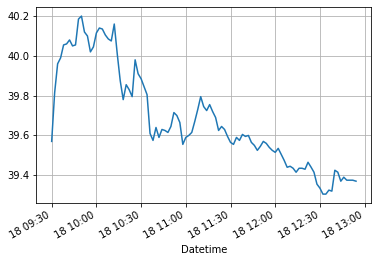

In [54]:
df['Close'].plot(grid = True);

In [55]:
# returns : 
daily_close = df[['Adj Close']]

In [56]:
daily_pct_change = (daily_close/daily_close.shift(1))-1

In [57]:
daily_pct_change.head(5)

,Adj Close
Datetime,
2020-11-18 09:30:00-05:00,NaN
2020-11-18 09:32:00-05:00,0.006192
2020-11-18 09:34:00-05:00,0.003642
2020-11-18 09:36:00-05:00,0.000751
2020-11-18 09:38:00-05:00,0.001625


In [58]:
len(daily_pct_change)

103

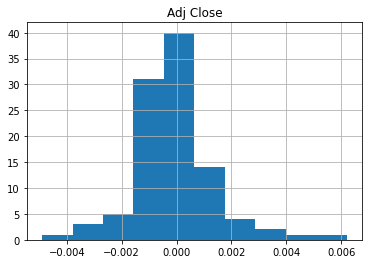

In [59]:
# looking at the histrgram
daily_pct_change.hist();


In [60]:
# inspect the daily statisics
daily_pct_change.describe()

,Adj Close
count,102.000000
mean,-0.000049
std,0.001495
min,-0.004899
25%,-0.000757
50%,-0.000253
75%,0.000509
max,0.006192


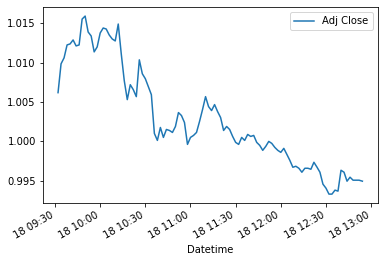

In [61]:
# plotting
cum_daily_return = (1+daily_pct_change).cumprod()
cum_daily_return.plot();

In [62]:
# how about monthly return
cum_daily_return.resample("M").mean()

,Adj Close
Datetime,
2020-11-30 00:00:00-05:00,1.002866


In [63]:
# changing the interval change the shape of the plot completely

### Multiple stocks

In [103]:
def read_multiple_data(stocks=['TSLA','LYFT']):
    
    """
    join data for multiple stocks with two keys, one for ticker and one for date
    
    """
    
    joind_data = map(read_data,stocks)

    return pd.concat(joind_data,keys = stocks, names = ['Ticker','Date'])

In [113]:
df = read_multiple_data(stocks=['ZM','AAPL','TSLA'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [114]:
df

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
ZM     2019-06-19  100.489998  104.445000   98.629997  102.389999  102.389999   
       2019-06-20  105.010002  107.339996  101.621002  102.300003  102.300003   
       2019-06-21  101.419998  101.531998   97.820000  100.470001  100.470001   
       2019-06-24  100.849998  101.500000   88.879997   89.410004   89.410004   
       2019-06-25   89.430000   91.500000   84.629997   85.029999   85.029999   
...                       ...         ...         ...         ...         ...   
TSLA   2020-11-12  415.049988  423.000000  409.519989  411.760010  411.760010   
       2020-11-13  410.850006  412.529999  401.660004  408.500000  408.500000   
       2020-11-16  408.929993  412.450012  404.089996  408.089996  408.089996   
       2020-11-17  460.170013  462.000000  433.010010  441.609985  441.609985   
       2020-11-18  448.350006  487.349487  443.500092  486.470001  486.470001   

                     Volume  
Ticker Date                  
ZM     2019-06-19   2592700  
       2019-06-20   2460700  
       2019-06-21   2972500  
       2019-06-24   6011200  
       2019-06-25   3744500  
...                     ...  
TSLA   2020-11-12  19855100  
       2020-11-13  19771100  
       2020-11-16  26838600  
       2020-11-17  61014500  
       2020-11-18  47469577  

[1080 rows x 6 columns]

In [115]:
df['daily_pct_change'] = (df['Adj Close']/df['Adj Close'].shift(1))-1

In [116]:
df = df.reset_index()

In [117]:
df['cum_daily_return'] = (1+df['daily_pct_change']).cumprod()

In [118]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,daily_pct_change,cum_daily_return
0,ZM,2019-06-19,100.489998,104.445000,98.629997,102.389999,102.389999,2592700,NaN,NaN
1,ZM,2019-06-20,105.010002,107.339996,101.621002,102.300003,102.300003,2460700,-0.000879,0.999121
2,ZM,2019-06-21,101.419998,101.531998,97.820000,100.470001,100.470001,2972500,-0.017889,0.981248
3,ZM,2019-06-24,100.849998,101.500000,88.879997,89.410004,89.410004,6011200,-0.110083,0.873230
4,ZM,2019-06-25,89.430000,91.500000,84.629997,85.029999,85.029999,3744500,-0.048988,0.830452
...,...,...,...,...,...,...,...,...,...,...
1075,TSLA,2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100,-0.012874,4.021487
1076,TSLA,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,-0.007917,3.989647
1077,TSLA,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,-0.001004,3.985643
1078,TSLA,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61014500,0.082139,4.313019


In [124]:
# plotting daily return

alt.Chart(df,title = 'Daily return').mark_line(interpolate='basis', ).encode(
    x='Date:T',
    y='daily_pct_change:Q',
    color='Ticker:N'
)



alt.Chart(...)

In [125]:
alt.Chart(df,title = 'Cumlative return').mark_line(interpolate='basis').encode(
    x='Date:T',
    y='cum_daily_return:Q',
    color='Ticker:N'
)



alt.Chart(...)